# Manipulate quantum states via Paddle Quantum's `state` module

_Copyright (c) 2023 Institute for Quantum Computing, Baidu Inc. All Rights Reserved._

The `state` module is a Paddle Quantum module that supports operations related to quantum states (`paddle_quantum.state.State`), mainly including the creation of quantum states and operations. The `state` module provides a number of interfaces for the user to create and edit quantum states and to interact with quantum circuits and measurements.

## Creation of states
User can create quantum states from existing data, or create special states by Paddle Quantum.
First we can create quantum states from existing data.

In [1]:
import paddle
import paddle_quantum as pq
from paddle_quantum.backend import Backend

state_vec = pq.state.to_state([1, 0])
print(state_vec)

/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/openfermion/hamiltonians/hartree_fock.py:11: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  from scipy.optimize.optimize import OptimizeResult
/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:


[1.+0.j 0.+0.j]


/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/paddle/fluid/framework.py:1104: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif dtype == np.bool:


The density matrix can also be created by specifying `backend`.

In [2]:
state_density = pq.state.State([[0.5, 0], [0, 0.5]], backend=Backend.DensityMatrix)
print(state_density)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


We can also create special types of quantum states by using the functions built into the Paddle Quantum. For example, we can create a single-qubit zero state.

In [3]:
print(pq.state.zero_state(num_qubits=1))

[1.+0.j 0.+0.j]


Create a 2-qubit random state.

In [4]:
print(pq.state.random_state(num_qubits=2))

[-0.00128883+0.02999492j  0.26680315-0.47462934j -0.22390576+0.8043244j
  0.00640717+0.07435807j]


In addition, the Paddle Quantum supports the creation of several other special quantum states. More detail can be found in [API ducument](https://qml.baidu.com/api/paddle_quantum.state.common.html). 

We can also set the global backend to be density matrix mode with a single line of code. Of course, we continue to use the default backend, i.e., the state vector, for this demonstration.

In [5]:
pq.set_backend('density_matrix') # set the global backend as density matrix
print(pq.state.zero_state(num_qubits=1))
pq.set_backend('state_vector')  # set back to the default backend

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


## Data of states
We can read the data in `State` by accessing `data`, `ket`, `bra`.

In [6]:
zero_state = pq.state.zero_state(num_qubits=1)
print('Its data is :', zero_state.data)
print('Its ket is :', zero_state.ket)
print('Its bra is :', zero_state.bra)

Its data is : Tensor(shape=[2], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [(1+0j), 0j    ])
Its ket is : Tensor(shape=[2, 1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(1+0j)],
        [0j    ]])
Its bra is : Tensor(shape=[1, 2], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(1-0j), -0j   ]])


We can also use the method `numpy()` to output `numpy.ndarray` type data for `State`.

In [7]:
print(zero_state.numpy())

[1.+0.j 0.+0.j]


## Operations of states
We can get the product of two quantum states by matrix multiplication `@`, which makes calculating the overlap of two states easy.

In [8]:
state_1 = pq.state.zero_state(num_qubits=1, backend=Backend.DensityMatrix)
state_2 = pq.state.to_state([[0, 0], [0, 1]], backend=Backend.DensityMatrix)
print(state_1 @ state_2)
print('The overlap of state_1 and state_2 is :', paddle.trace(state_1 @ state_2))

Tensor(shape=[2, 2], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[0j, 0j],
        [0j, 0j]])
The overlap of state_1 and state_2 is : Tensor(shape=[1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [0j])


User can also use `State.kron()` to find the tensor product $\rho \otimes \sigma$ of the quantum states $\rho$ and $\sigma$.

In [9]:
rho = pq.state.zero_state(num_qubits=1)
sigma = pq.state.to_state([0, 1])
product_state = rho.kron(sigma)
print(product_state)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


We can give partial trace on states by slicing or indexing. For example, we want to get the state of the first qubit of $|011\rangle$ and the state of the last two qubits.

In [10]:
psi_012 = pq.state.computational_basis(num_qubits=3, index=3)
print(psi_012)

psi_1 = psi_012[0]
psi_12 = psi_012[1:]
print('the state of the first qubit is :', psi_1)
print('the state of the second and third qubits is :',psi_12)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
the state of the first qubit is : [1.+0.j 0.+0.j]
the state of the second and third qubits is : [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


## Measurement and evolution of states
The method `State.evolve()` of a quantum state can give the final state of the quantum state under $e^{-iHt}$ evolution given the Hamiltonian $H$ and the evolution time $t$. Here we set the Hamiltonian to be the Pauli $Z$ matrix and the evolution time $t=1$.

In [11]:
state = pq.state.zero_state(num_qubits=1)
t = 1
hamiltonian = pq.hamiltonian.Hamiltonian([(1, 'Z0')])
state.evolve(H=hamiltonian, t=t)
print(state)

[0.5403023-0.84147096j 0.       +0.j        ]


The method `State.expec_val()` of states can calculate the expectation under given observables (Hamiltonian).

In [12]:
state = pq.state.zero_state(num_qubits=1)
observable = pq.hamiltonian.Hamiltonian([(1, 'Z0')])
print(state.expec_val(hamiltonian=observable))

1.0


`State.measure()` can give the measurement result in the computational basis. The user can set the `shots` value to simulate or make `shots=0` to calculate the expectation, or use the `plot` parameter to make a plot.

Theoretical value is : {'0': 0.5, '1': 0.5}


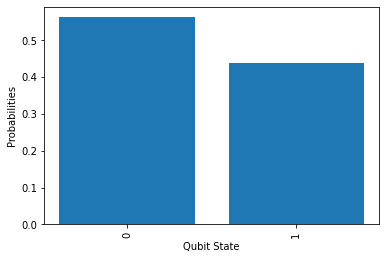

{'0': 0.5625, '1': 0.4375}

In [13]:
state = pq.state.to_state([[0.5, 0], [0, 0.5]], backend=Backend.DensityMatrix)
print('Theoretical value is :', state.measure(shots=0))  # theoretical value
state.measure(shots=16, plot=True)